WAVELET HALO V vs VdelE




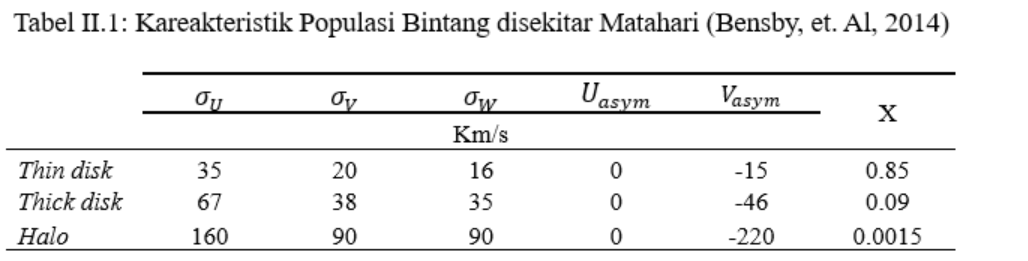

In [1]:
'''0. Import Library phyton'''
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
'''1. BACA DATA'''
#U,V,W, VdelE koreksi LSR
u, v, w, vdele = np.loadtxt("thick.csv", delimiter=",", usecols=(47,48,49,52), skiprows=1, unpack=True)
#47 = U koreksi LSR
#48 = V koreksi LSR
#49 = W koreksi LSR
#52 = VdelE koreksi LSR

"'\n# Scatter plot U vs V\nplt.figure(dpi=200, figsize=(12,18))\nplt.subplot(321)\nplt.scatter(u,v,s=3)\nplt.xlabel('U (km/s)',fontsize=12)\nplt.ylabel('V (km/s)',fontsize=12)\nplt.title('Thin Disk')\nplt.savefig('THINScatterUV.png')"

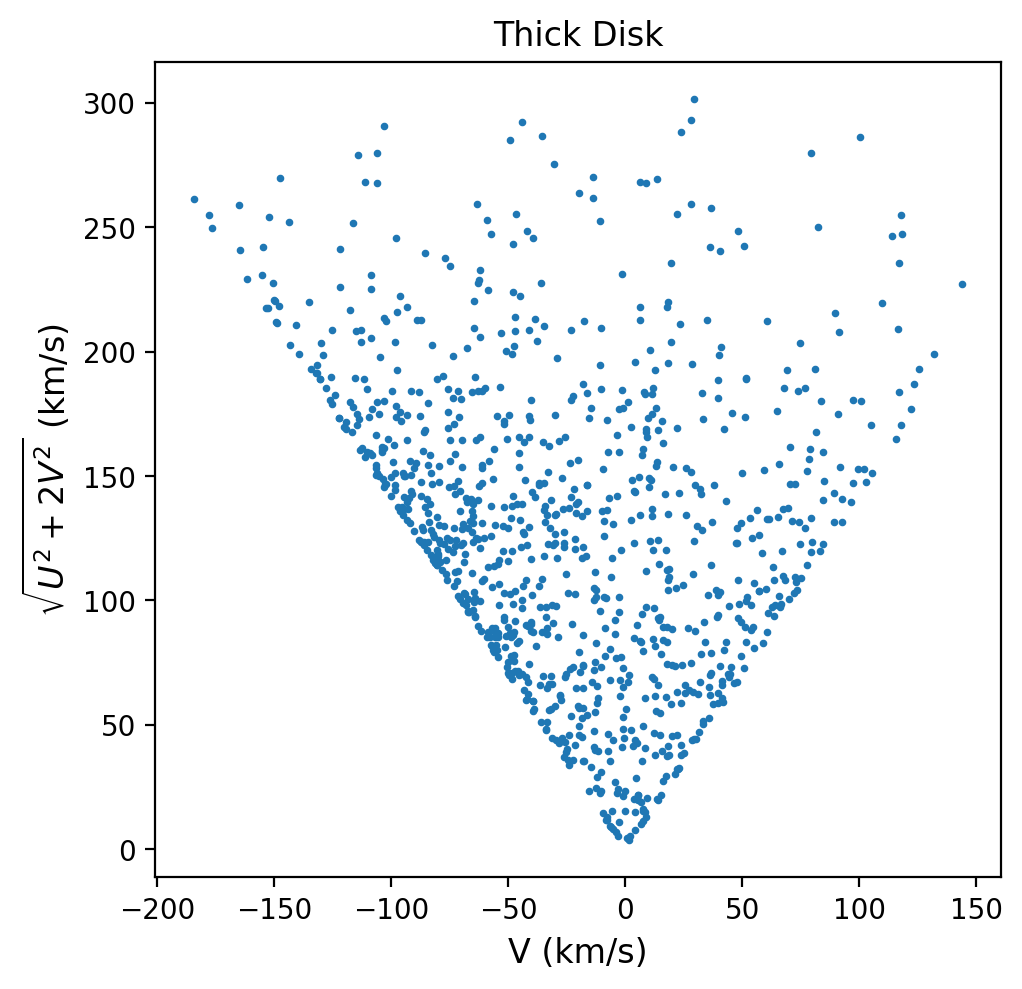

In [3]:
'''2. SCATTER PLOT DATA THICK DISK'''
#Scatter plot V vs VdelE
plt.figure(dpi=200, figsize=(12,18))
plt.subplot(321)
plt.scatter(v,vdele,s=3)
plt.xlabel('V (km/s)',fontsize=12)
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)
plt.title('Thick Disk')
plt.savefig('THICKScatterVVdelE.png')
''''
# Scatter plot U vs V
plt.figure(dpi=200, figsize=(12,18))
plt.subplot(321)
plt.scatter(u,v,s=3)
plt.xlabel('U (km/s)',fontsize=12)
plt.ylabel('V (km/s)',fontsize=12)
plt.title('Thin Disk')
plt.savefig('THINScatterUV.png')'''

In [4]:
'''2. SIMULASI MONTE CARLO 5 KALI'''
# Monte Carlo
u_mc = [[] for i in range (5)]
v_mc = [[] for i in range (5)]
w_mc = [[] for i in range (5)]
vdele_mc = [[] for i in range (5)]

# Input parameter di Halo, ini udah koreksi LSR
for i in range (5):
    ''''u_mc[i] = np.random.normal(0, 160, len(u)) #input :U,dispersi U,jumlah bintang halo
    v_mc[i] = np.random.normal(-220, 90, len(v))
    w_mc[i] = np.random.normal(0, 90, len(w))'''
    u_mc[i] = np.random.normal(0, 67, len(u)) #input :U,dispersi U,jumlah bintang thick
    v_mc[i] = np.random.normal(-46, 38, len(v))
    w_mc[i] = np.random.normal(0, 35, len(w))
    #menghitung vdele yang sebanding dengan eksentrisitas
    vdele_mc[i] = np.power((np.power(u_mc[i],2) + 2*np.power(v_mc[i],2)),0.5)

In [5]:
'''MENDEFINISIKAN WAVELET'''
#Mendefinisikan fungsi maxican hat
def mexico (rr, scale):
    return (2 - rr**2 / (scale**2)) * np.exp(-rr**2 / (2*scale**2))
#Mendefinisikan koefisien wavelet
def koefisien (xstart, xend, ystart, yend, dx, dy, x, y, a):
    xgrid = np.arange(xstart, xend, dx)
    ygrid = np.arange(ystart, yend, dy)
    nxgrid= len(xgrid)
    nygrid= len(ygrid)
    coef = np.zeros((nxgrid, nygrid))
    #membaca setiap pixel
    for i in range (len(x)-1):
        for p in range (nxgrid):
            for q in range (nygrid):
                xx = xgrid[p] - x[i]
                yy = ygrid[q] - y[i]
                r = np.sqrt(xx*xx + yy*yy)
                coef[q][p] += mexico(r, a)
    #me-nol-kan nilai wavelet yang negatif
    coef[coef<0]=0
    return coef

In [6]:
'''3. MENDEFINISIKAN WAVELET KOEFISISEN MC SAJA'''
def KOEFMC (xstart, xend, ystart, yend, dx, dy, x_mc, y_mc, a):
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    return wmc

In [7]:
'''4. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 0'''
def SIGNAL0 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >0
    sig[sig<0] = 0
    return sig

In [8]:
'''5. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 1'''
def SIGNAL1 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >1
    sig[sig<1] = 0
    return sig

In [9]:
'''6. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 2'''
def SIGNAL2 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >2
    sig[sig<2] = 0
    return sig

In [10]:
'''7. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 3
def SIGNAL3 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >3
    sig[sig<3] = 0
    return sig'''

'7. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 3\ndef SIGNAL3 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):\n    #data\n    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)\n    #monte carlo 5 kali\n    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)\n    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)\n    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)\n    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)\n    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)\n    #monte carlo rata-rata\n    wmc = (np.array(wmc1) + np.array(wmc2) +\n                np.array(wmc3) + np.array(wmc4) +\n                np.array(wmc5))/5\n    #mengurangi wavelet\n    wavelet = w-wmc\n    #me-nol-kan nilai wavelet yang negatif\n    wavelet[wavelet<0] = 0\n    #signifikan signal\n    sig = wavelet/np.std(wmc)\n    #signifikan signal >3\n    sig[sig<3] = 0\n    return

In [11]:
'''PARAMETER ALL THICK DISK'''
start_time = time.time()

'''xgrid = np.arange(-300,300,6)
ygrid = np.arange(0,600,6)
X, Y = np.meshgrid(xgrid, ygrid)

xgrid1 = np.arange(-300,300,6)
ygrid1 = np.arange(0,600,6)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)'''

xgrid = np.arange(-175,125,3)
ygrid = np.arange(0,300,3)
X, Y = np.meshgrid(xgrid, ygrid)

xgrid1 = np.arange(-175,125,3)
ygrid1 = np.arange(0,300,3)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)


# Parameter KOEF MC
M2 = KOEFMC(-175,125,0,300,3,3,v_mc,vdele_mc,2)
M4 = KOEFMC(-175,125,0,300,3,3,v_mc,vdele_mc,4)
M6 = KOEFMC(-175,125,0,300,3,3,v_mc,vdele_mc,6)
M8 = KOEFMC(-175,125,0,300,3,3,v_mc,vdele_mc,8)
M10 = KOEFMC(-175,125,0,300,3,3,v_mc,vdele_mc,10)
M12 = KOEFMC(-175,125,0,300,3,3,v_mc,vdele_mc,12)

'''
# Parameter KOEF MC
M2 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,2)
M4 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,4)
M6 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,6)
M8 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,8)
M10 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,10)
M12 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,12)
'''

# Parameter SIGNIFIKAN SIGNAL 0
S02 = SIGNAL0(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,2)
S04 = SIGNAL0(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,4)
S06 = SIGNAL0(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,6)
S08 = SIGNAL0(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,8)
S010 = SIGNAL0(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,10)
S012 = SIGNAL0(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 0
S02 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S04 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S06 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S08 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S010 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S012 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)
'''

# Parameter SIGNIFIKAN SIGNAL 1
S12 = SIGNAL1(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,2)
S14 = SIGNAL1(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,4)
S16 = SIGNAL1(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,6)
S18 = SIGNAL1(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,8)
S110 = SIGNAL1(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,10)
S112 = SIGNAL1(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 1
S12 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S14 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S16 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S18 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S110 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S112 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)
'''

# Parameter SIGNIFIKAN SIGNAL 2
S22 = SIGNAL2(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,2)
S24 = SIGNAL2(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,4)
S26 = SIGNAL2(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,6)
S28 = SIGNAL2(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,8)
S210 = SIGNAL2(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,10)
S212 = SIGNAL2(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 2
S22 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S24 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S26 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S28 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S210 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S212 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)


# Parameter SIGNIFIKAN SIGNAL 3
S32 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,2)
S34 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,4)
S36 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,6)
S38 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,8)
S310 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,10)
S312 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,12)

# Parameter SIGNIFIKAN SIGNAL 3
S32 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S34 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S36 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S38 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S310 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S312 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)
'''

'\n# Parameter SIGNIFIKAN SIGNAL 2\nS22 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)\nS24 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)\nS26 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)\nS28 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)\nS210 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)\nS212 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)\n\n\n# Parameter SIGNIFIKAN SIGNAL 3\nS32 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,2)\nS34 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,4)\nS36 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,6)\nS38 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,8)\nS310 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,10)\nS312 = SIGNAL3(-175,125,0,300,3,3,v,vdele,v_mc,vdele_mc,12)\n\n# Parameter SIGNIFIKAN SIGNAL 3\nS32 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)\nS34 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)\nS36 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)\nS38 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc

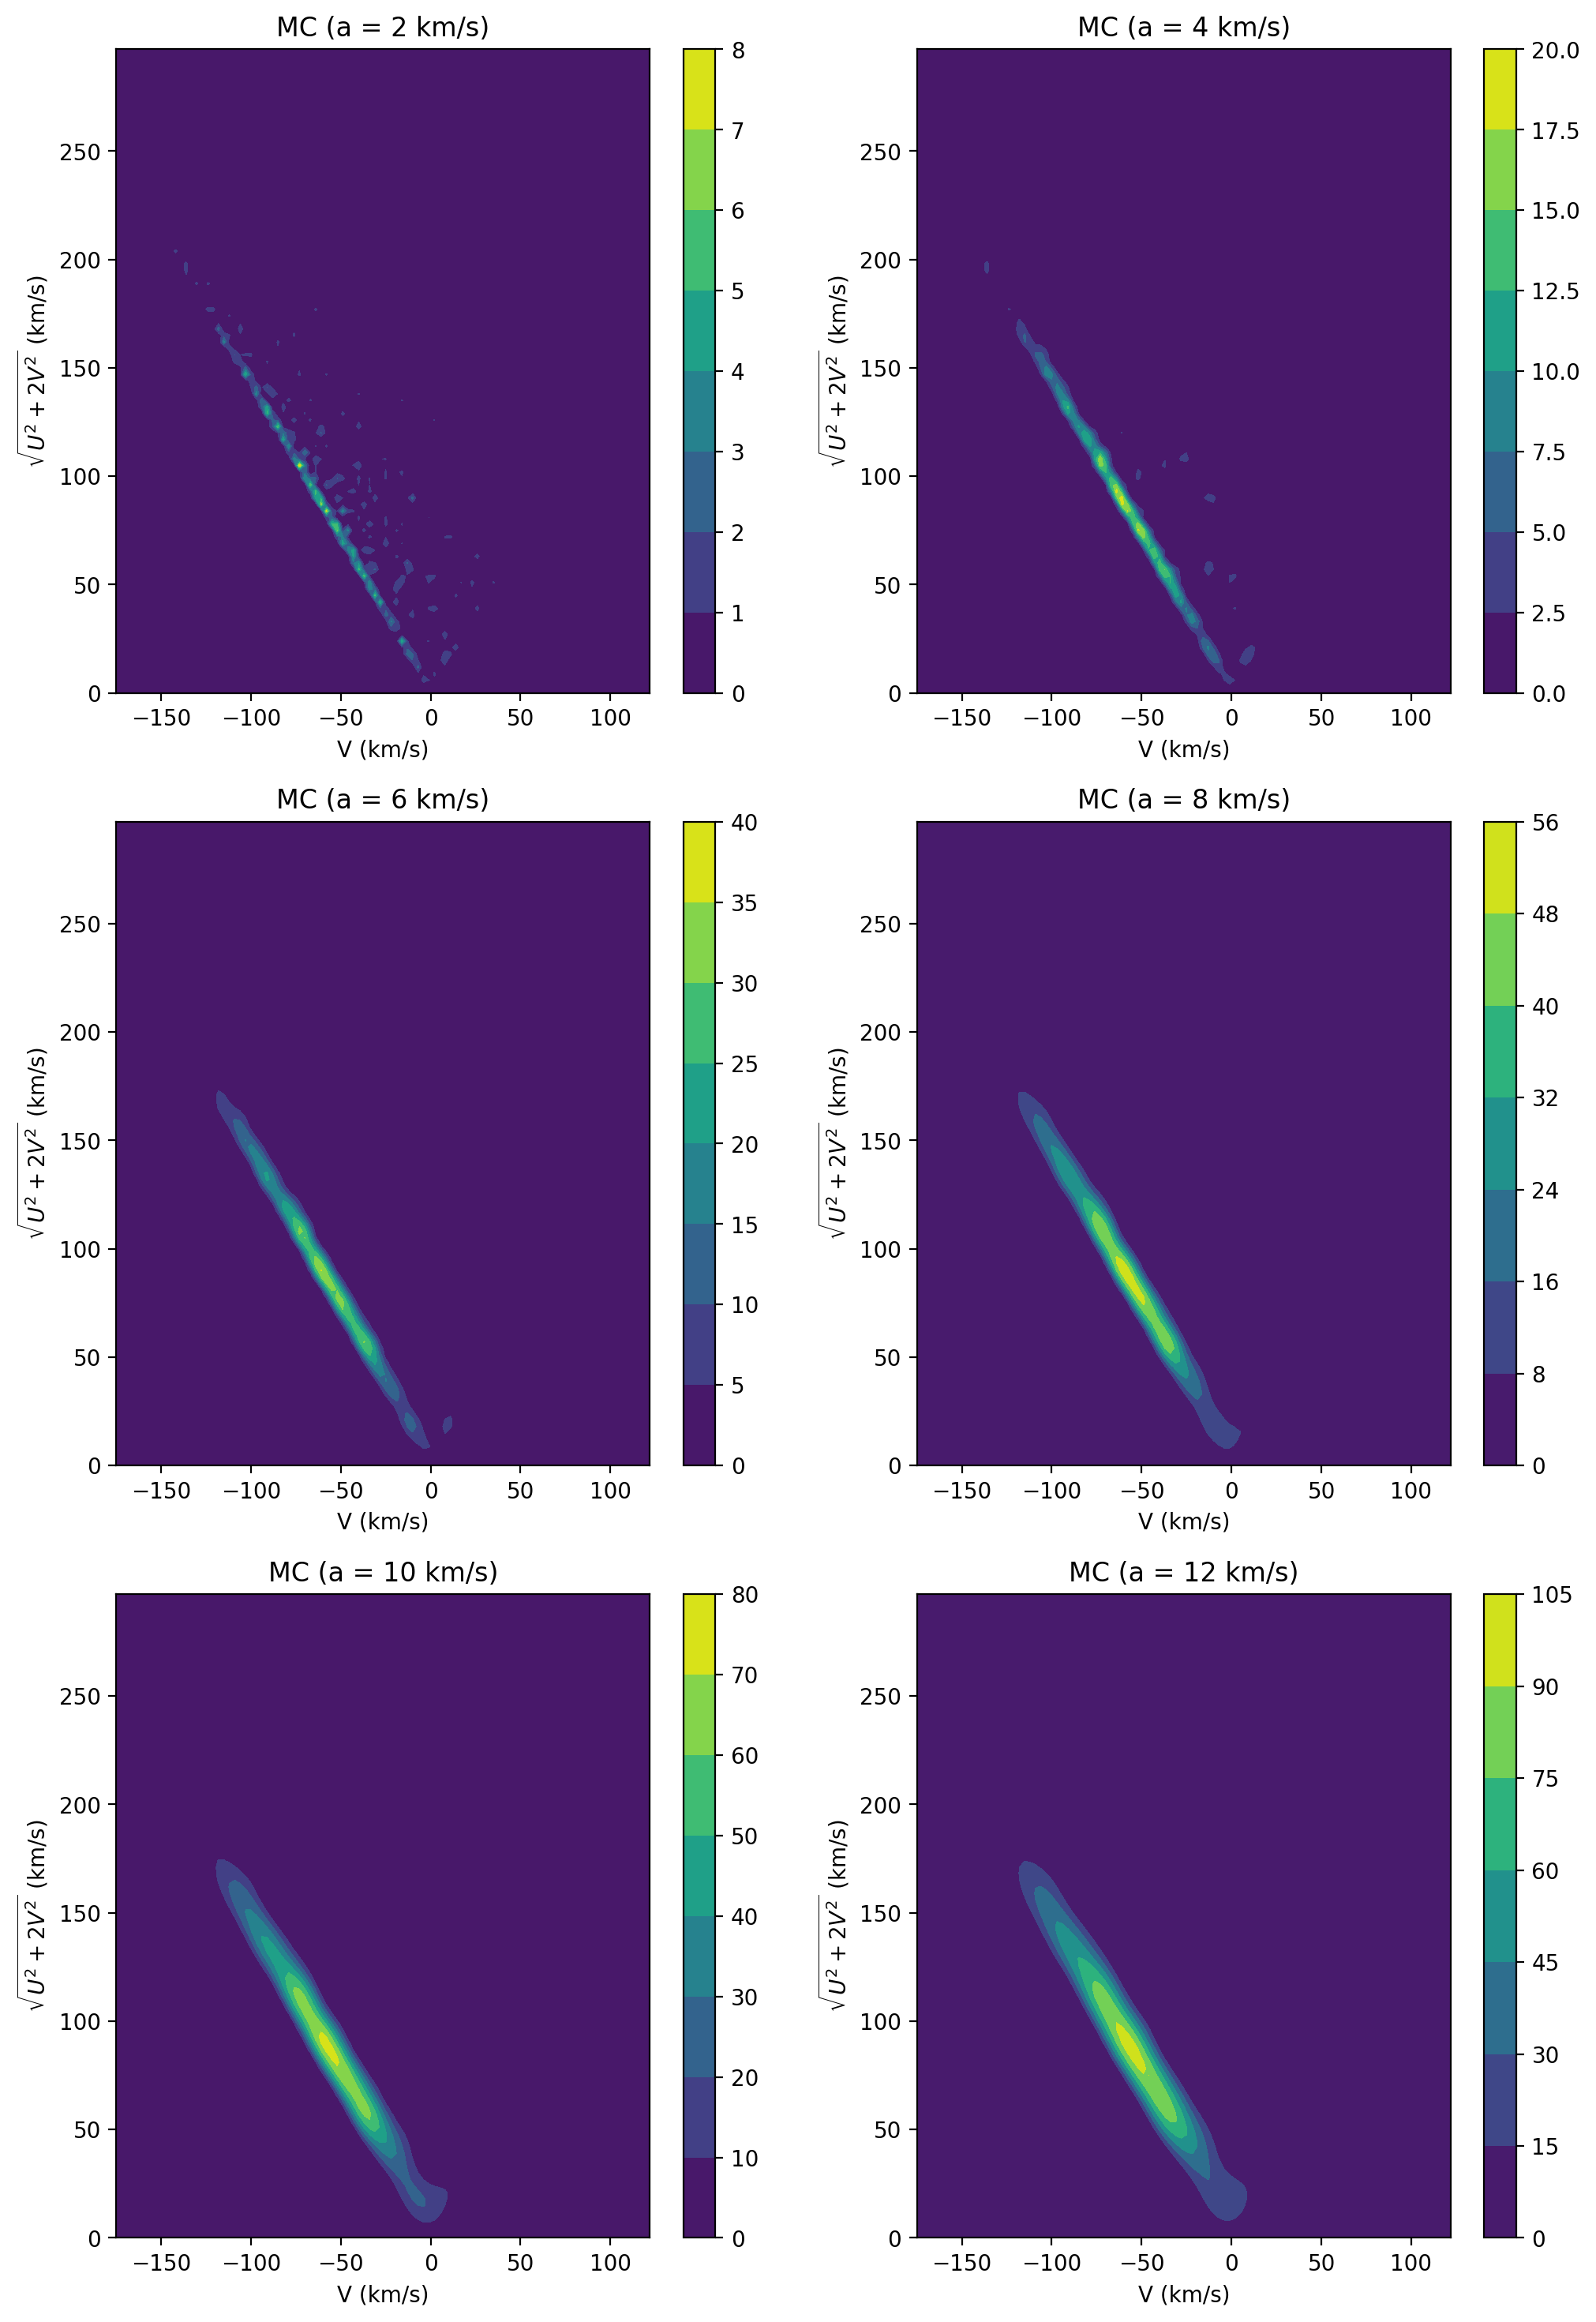

In [12]:
'''PLOT WAVELET KOEF MONTE CARLO'''
plt.figure(dpi=200, figsize=(12,18))

'''
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)'''

plt.subplot(321)
plt.contourf(X,Y,M2,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('MC (a = 2 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,M4,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('MC (a = 4 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,M6,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('MC (a = 6 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,M8,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('MC (a = 8 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,M10,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('MC (a = 10 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,M12,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('MC (a = 12 km/s)', fontsize=12)
plt.colorbar()

plt.savefig('THICKMC.png')
plt.show()

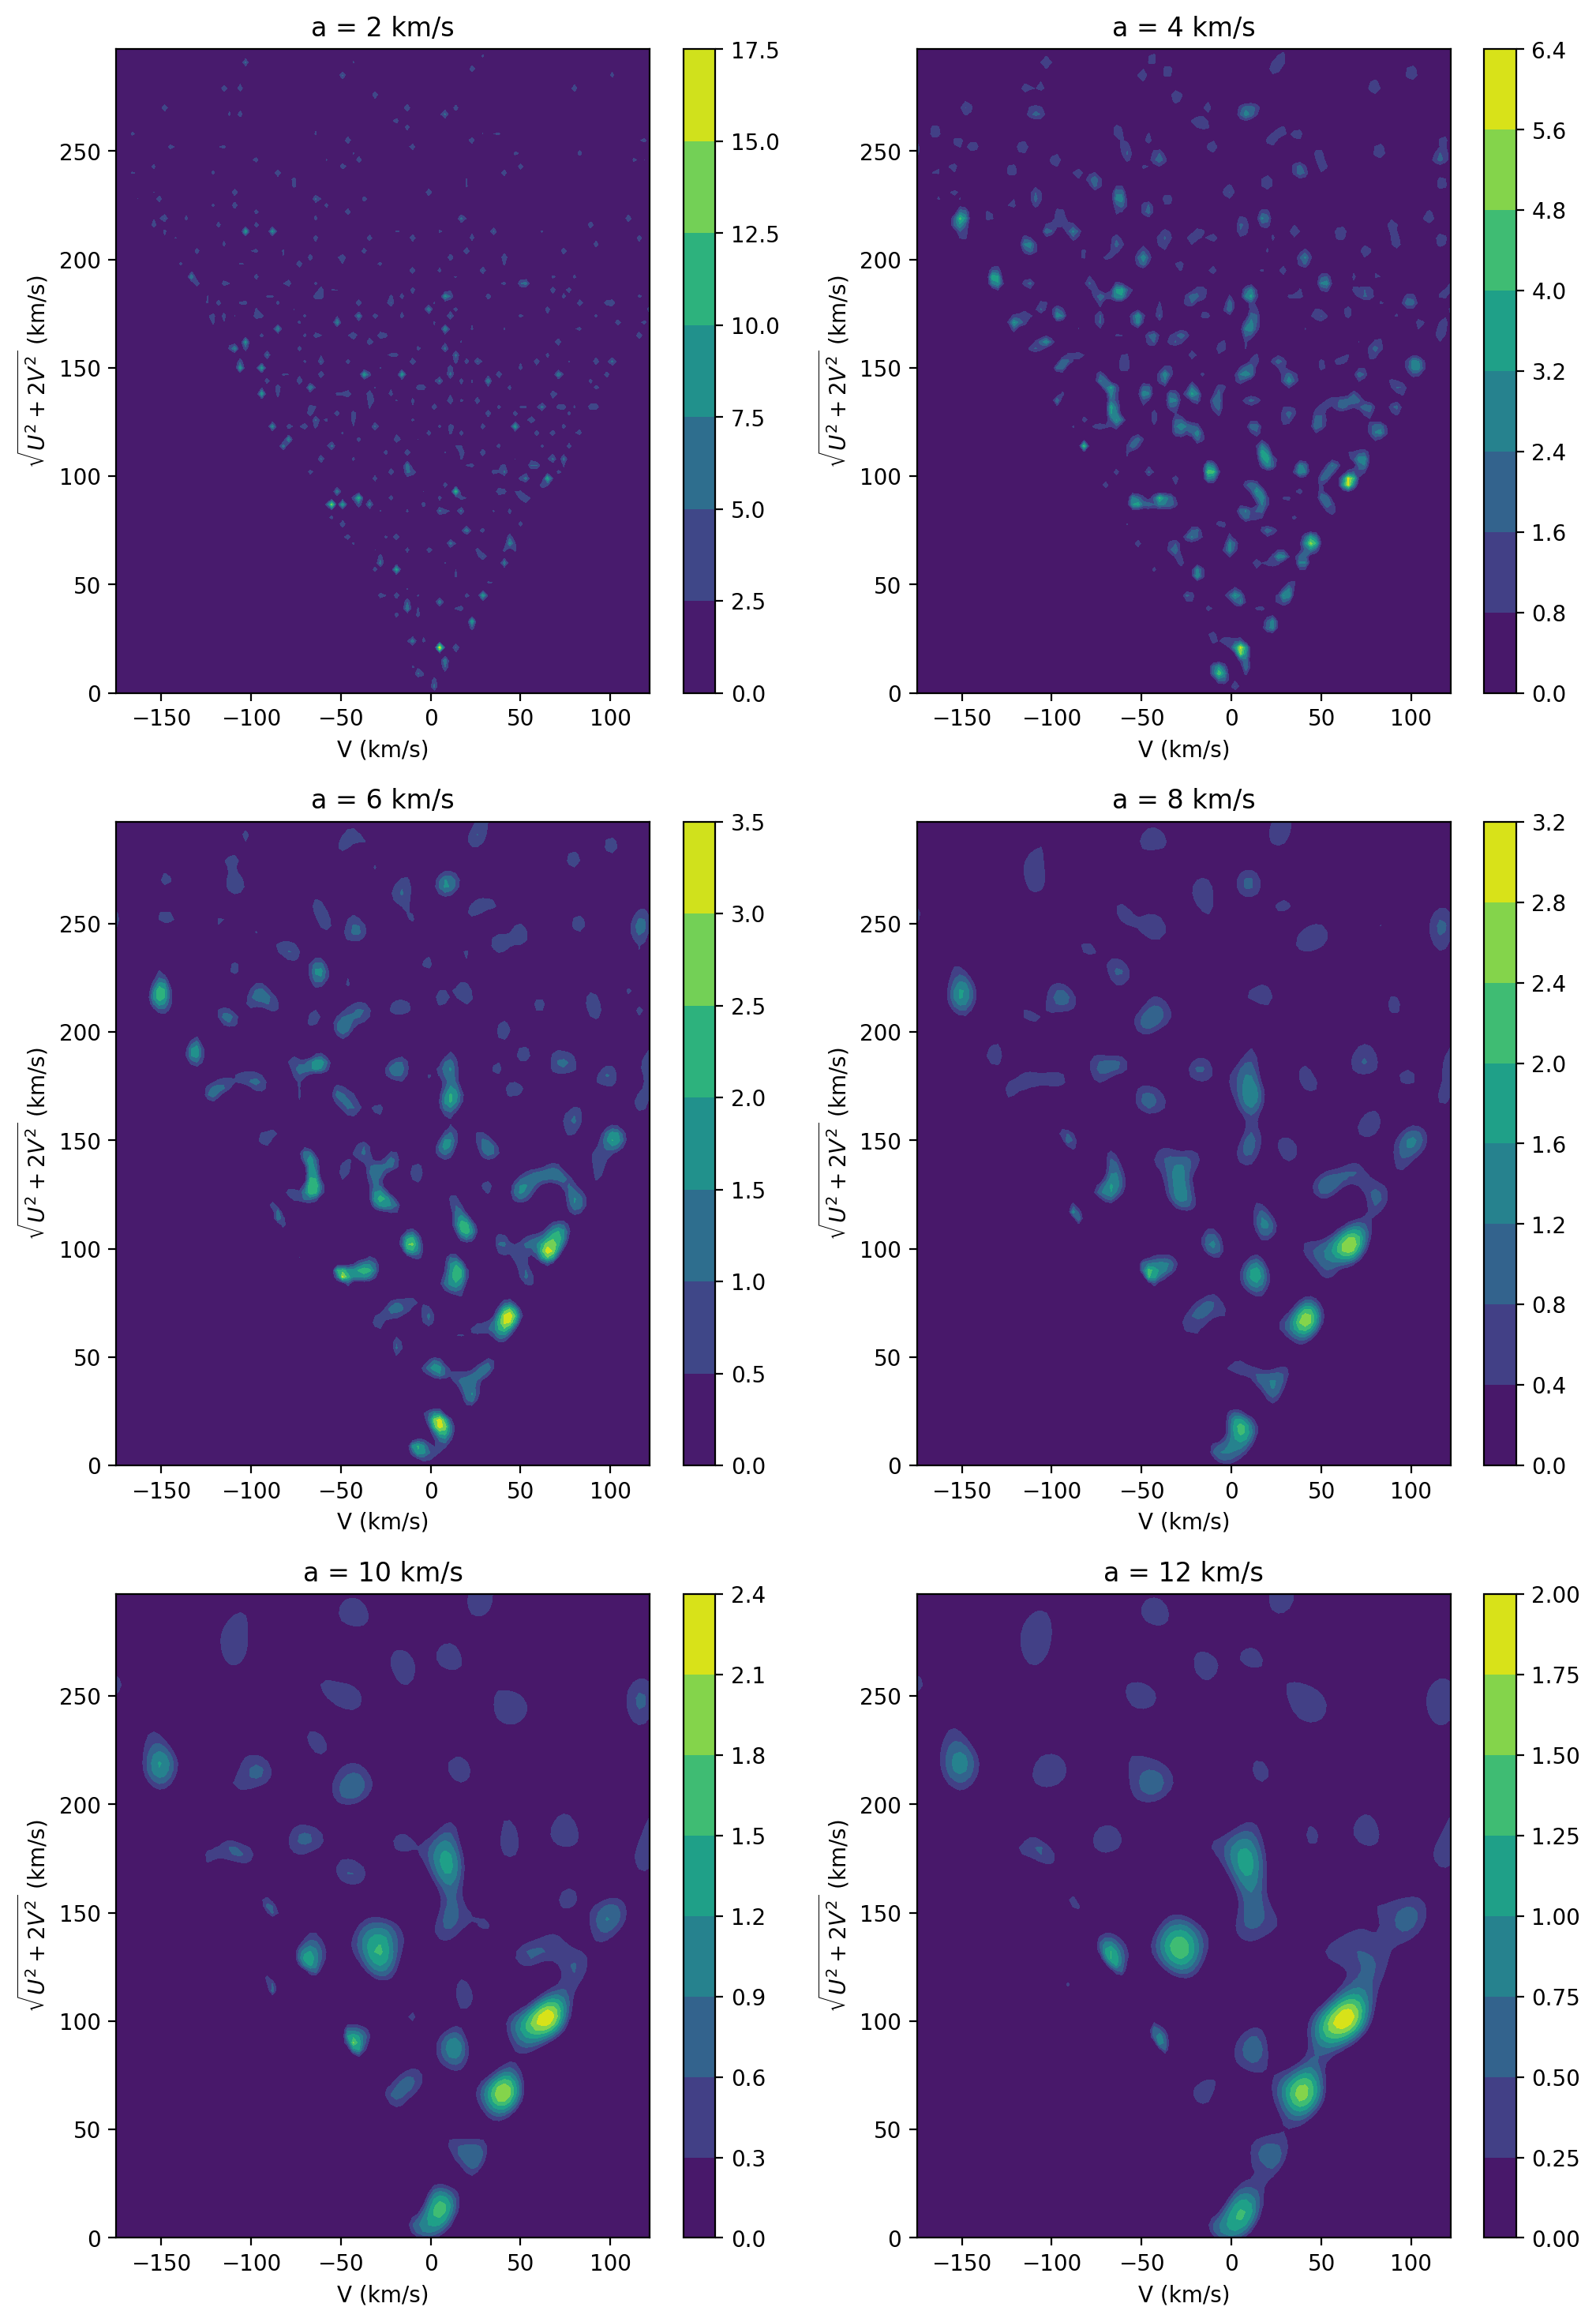

In [13]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL > 0 '''

plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S02,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S04,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S06,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S08,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S010,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S012,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THICKSIGNAL0.png')
plt.show()

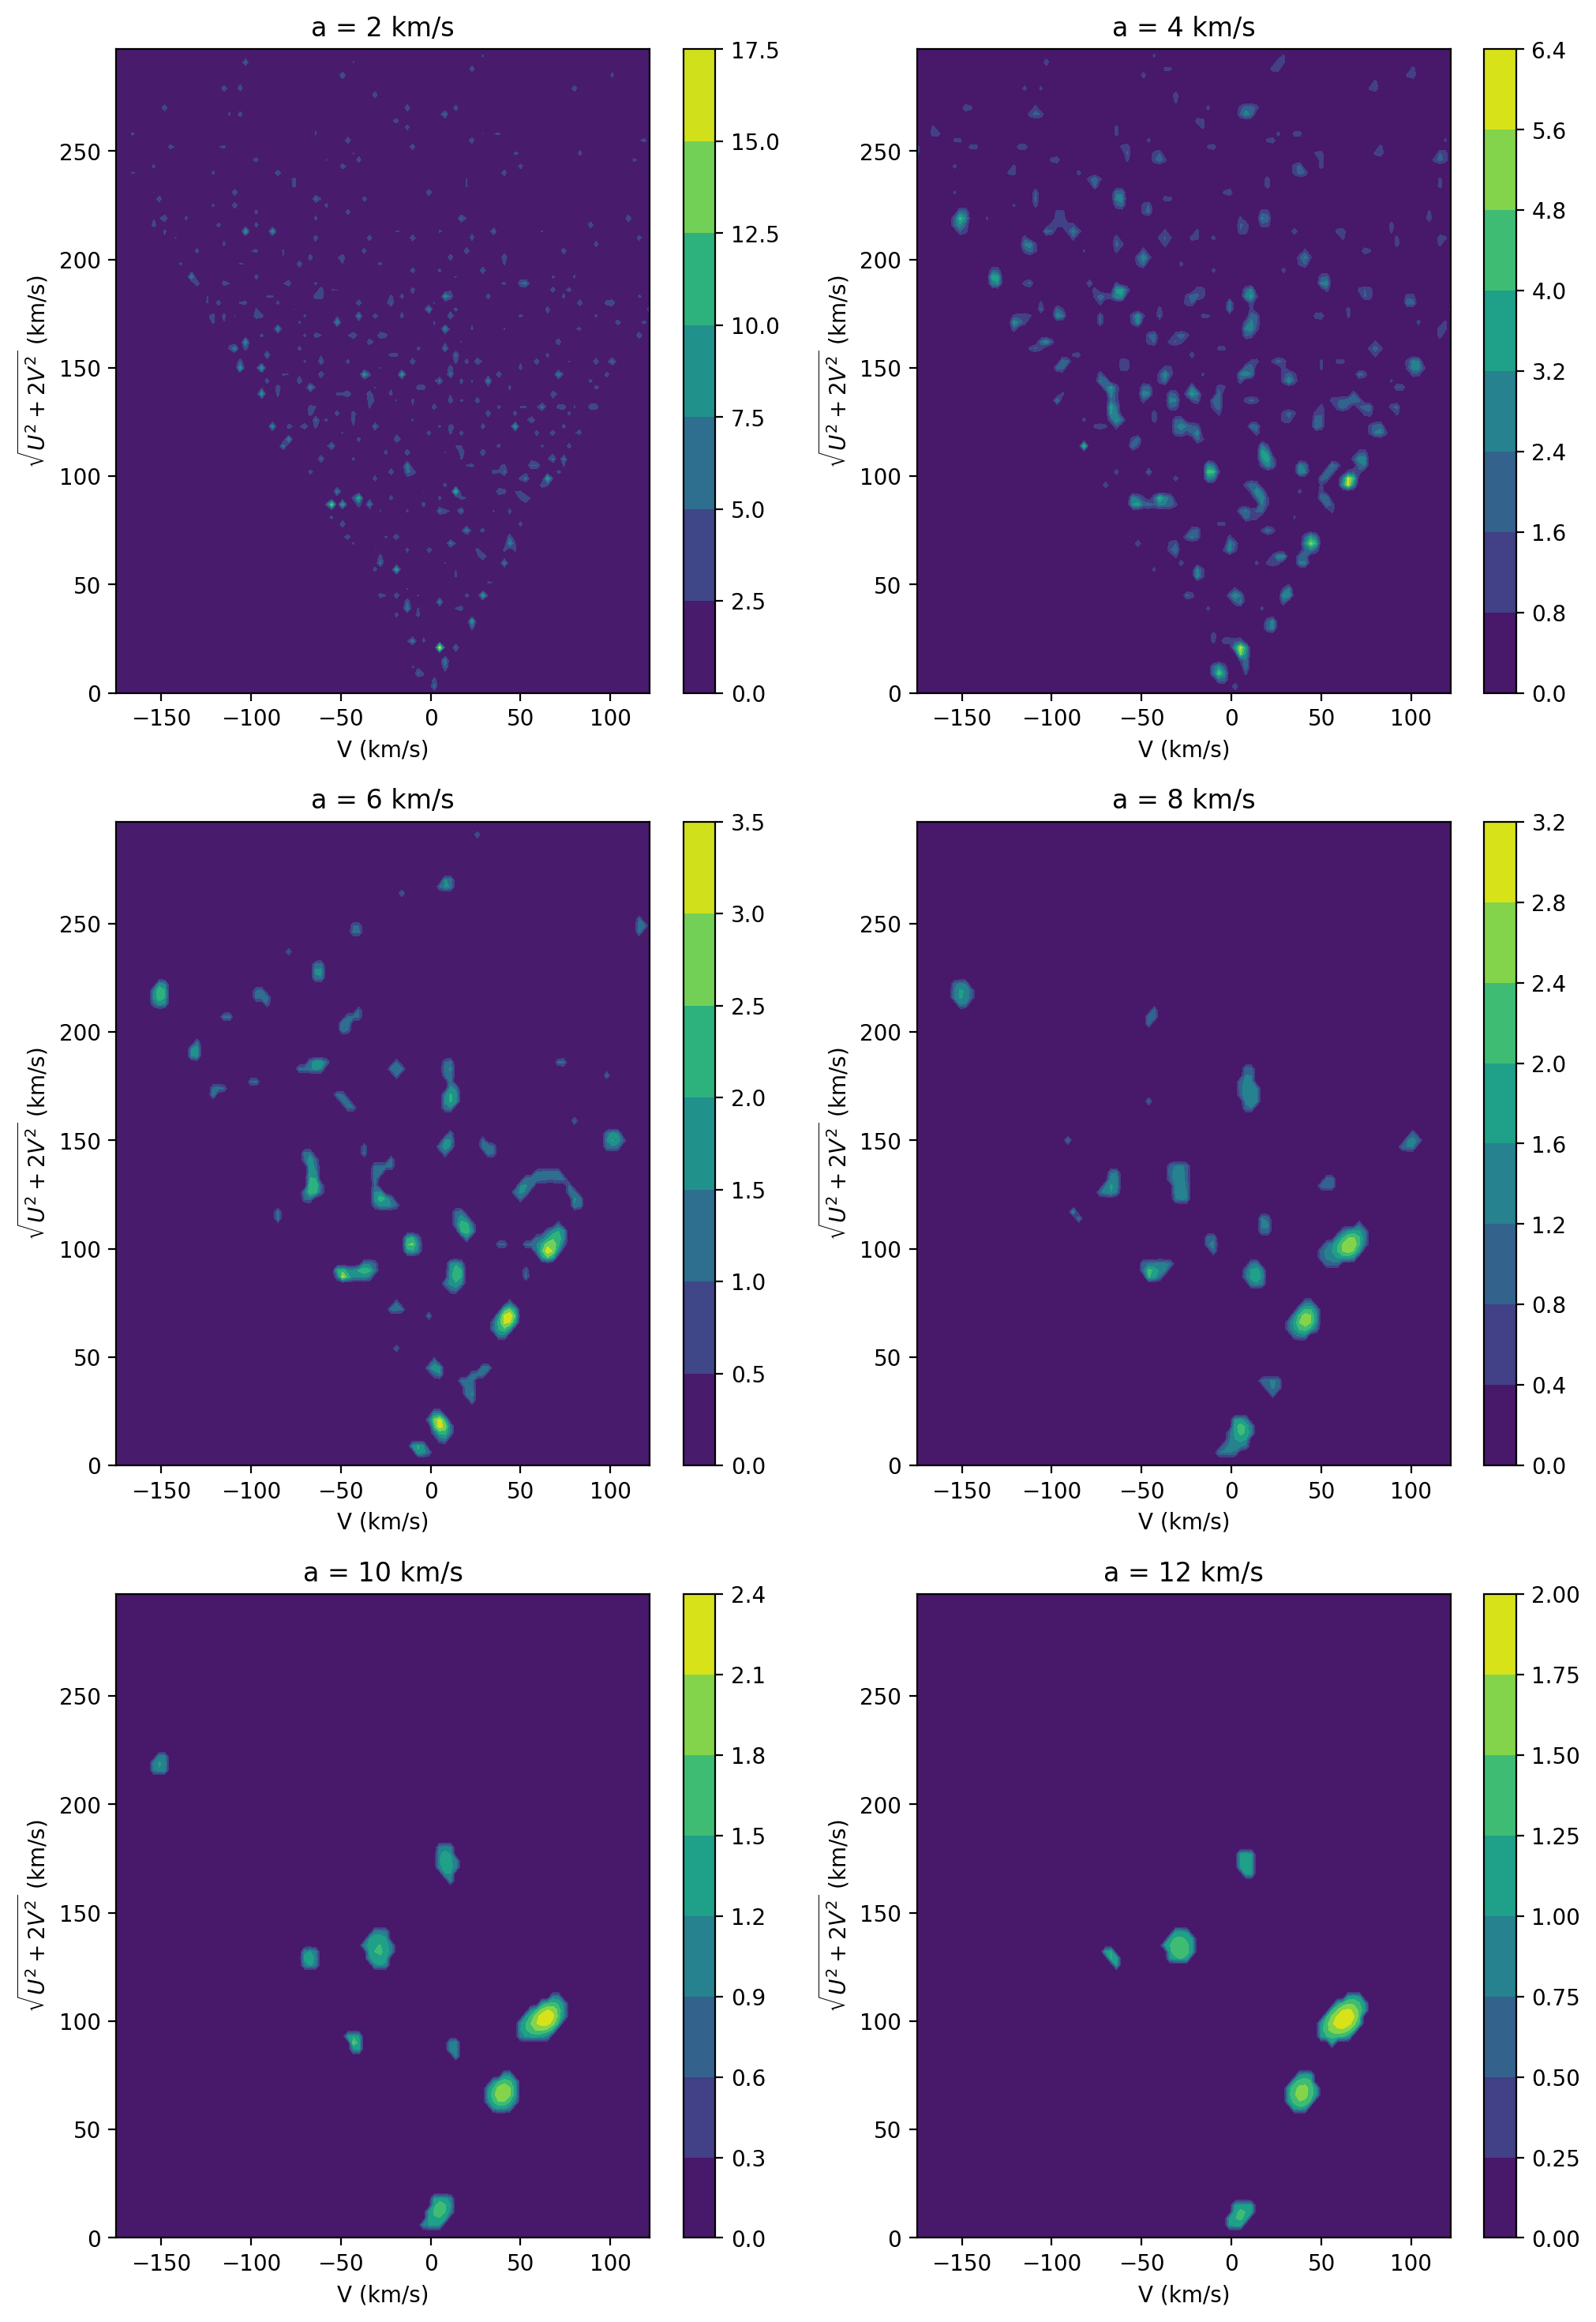

In [14]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL >1'''

plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S12,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S14,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S16,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S18,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S110,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S112,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THICKSIGNAL1.png')
plt.show()

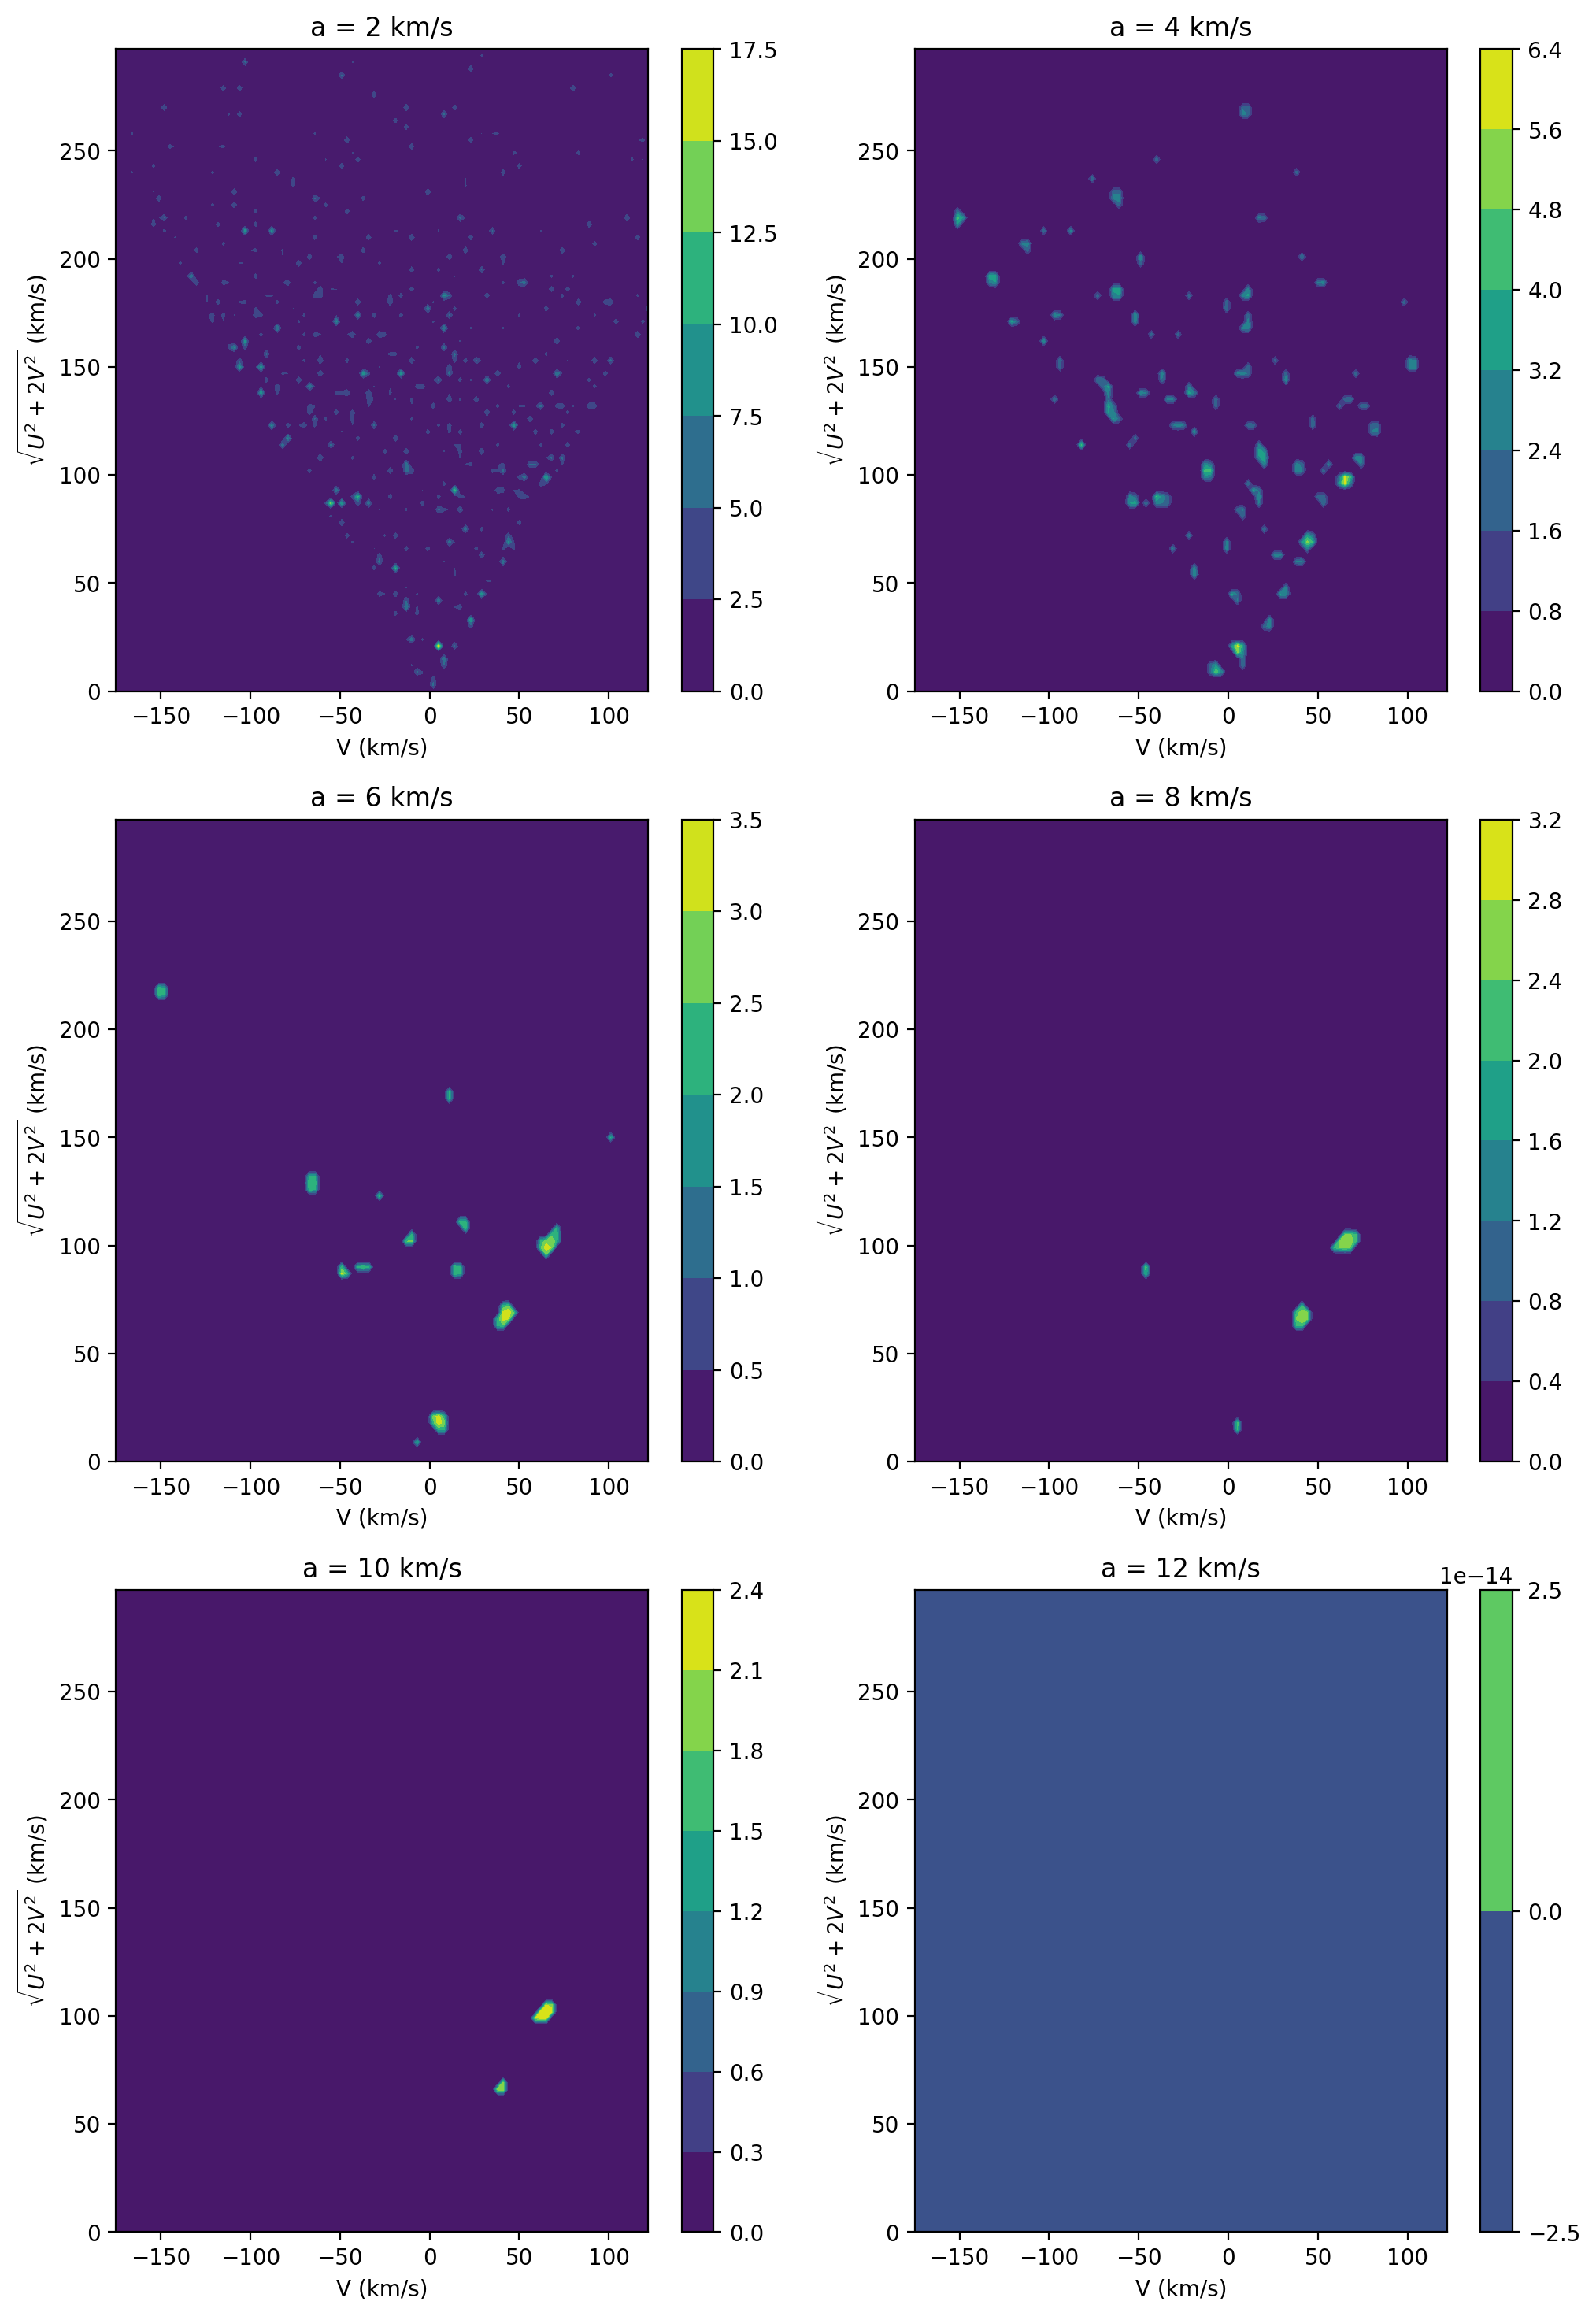

In [15]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL >2'''
plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S22,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S24,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S26,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S28,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S210,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S212,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THICKSIGNAL2.png')
plt.show()

In [16]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL >3
plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S32,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S34,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S36,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S38,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S310,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S312,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THICKSIGNAL3.png')
plt.show()'''

"PLOT WAVELET SIGNIFIKAN SIGNAL >3\nplt.figure(dpi=200, figsize=(12,18))\n\nplt.subplot(321)\nplt.contourf(X,Y,S32,cmap='viridis')\nplt.xlabel('V (km/s)')\nplt.ylabel(r'$\\sqrt{U^2+2V^2}$ (km/s)')\nplt.title('a = 2 km/s', fontsize=12)\nplt.colorbar()\n\nplt.subplot(322)\nplt.contourf(X,Y,S34,cmap='viridis')\nplt.xlabel('V (km/s)')\nplt.ylabel(r'$\\sqrt{U^2+2V^2}$ (km/s)')\nplt.title('a = 4 km/s', fontsize=12)\nplt.colorbar()\n\nplt.subplot(323)\nplt.contourf(X,Y,S36,cmap='viridis')\nplt.xlabel('V (km/s)')\nplt.ylabel(r'$\\sqrt{U^2+2V^2}$ (km/s)')\nplt.title('a = 6 km/s', fontsize=12)\nplt.colorbar()\n\nplt.subplot(324)\nplt.contourf(X,Y,S38,cmap='viridis')\nplt.xlabel('V (km/s)')\nplt.ylabel(r'$\\sqrt{U^2+2V^2}$ (km/s)')\nplt.title('a = 8 km/s', fontsize=12)\nplt.colorbar()\n\nplt.subplot(325)\nplt.contourf(X,Y,S310,cmap='viridis')\nplt.xlabel('V (km/s)')\nplt.ylabel(r'$\\sqrt{U^2+2V^2}$ (km/s)')\nplt.title('a = 10 km/s', fontsize=12)\nplt.colorbar()\n\nplt.subplot(326)\nplt.contourf(X

In [17]:
elapsed_time=(time.time()-start_time)/60
print(elapsed_time,'menit')

308.9367641766866 menit
